<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/lab_10_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab_10_4: ImageFolder
##contents
- dataset 준비
  - torchvision.datasets.ImageFolder으로 불러오기
  - transforms 적용하여 저장 origin_data-> train_data
- 사진 분류 딥러닝 모델 학습

### example   
- 의자 사진 dataset 준비
- origin_data: class1) gray, class2) red
- image 크기를 줄여서 저장해보자


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader

In [12]:
# 사진이 Python image library에서 불리기 때문에 notebook에서 표시하기 위한 코드
from matplotlib.pyplot import imshow
%matplotlib inline

In [15]:
train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/custom_data/origin_data', transform=None)

0 <PIL.Image.Image image mode=RGB size=512x256 at 0x7F44DDCA05D0> 0


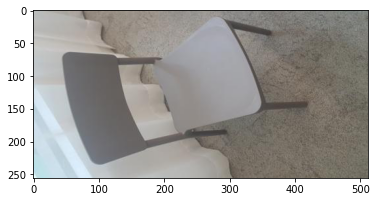

In [16]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)

    imshow(data)
    break

- image size 줄이기

In [19]:
trans = transforms.Compose([    # transform 묶어서 진행
    transforms.Resize((64,128))
])
train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/custom_data/origin_data', transform=trans)

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F44DDBDFED0> 0


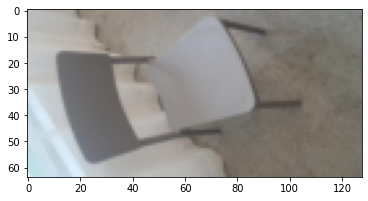

In [20]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)

    imshow(data)
    break

In [ ]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('/content/drive/MyDrive/custom_data/train_data/gray/%d_%d.jpeg'%(num, label))
    else:
         data.save('/content/drive/MyDrive/custom_data/train_data/gray/%d_%d.jpeg'%(num, label))
# 저장이 안되네:(

#### Neural Network 만들기
<img src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAzMDZfMjEx%2FMDAxNjE1MDIzOTQ4OTc0.FkI-MSvtvzL63V0AL1EmT6hjzU562c1A8Lwd_PQjYLkg.67yg6ZD29awHPZl-MG2FQoo8gfkAEBD8Mlt6tPXGc04g.PNG.na_young_1124%2F%25C8%25AD%25B8%25E9_%25C4%25B8%25C3%25B3_2021-03-06_184543.png&type=a340" width="500px" height="300px"></img>

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [27]:
trans = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/custom_data/train_data', transform=trans)

In [28]:
data_loader = DataLoader(dataset = train_data, batch_size = 8, shuffle = True, num_workers=2)

In [32]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print(out.shape)
        out = out.view(out.shape[0], -1)
        # print(out.shape)    --> size확인 tip
        out = self.layer3(out)
        return out

In [33]:
#testing 
net = CNN().to(device)
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

torch.Size([3, 6, 30, 62])
torch.Size([3, 16, 13, 29])
torch.Size([3, 6032])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [39]:
optimizer = optim.Adam(net.parameters(), lr=0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

In [41]:
total_batch = len(data_loader)

epochs = 5
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(data_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()

        avg_cost += loss / total_batch

    print('[Epoch:{}] cost={}'.format(epoch+1, avg_cost))
print('Learning Finished!')

torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])
torch.Size([8, 6, 30, 62])
torch.Size([8, 16, 13, 29])
torch.Size([8, 6032])

- 학습시킨 model save & load

In [47]:
# model save
torch.save(net.state_dict(), '/content/drive/MyDrive/custom_data/model/model.pth')

In [48]:
# model load
new_net = CNN().to(device)  # 새 network 생성

In [49]:
new_net.load_state_dict(torch.load('/content/drive/MyDrive/custom_data/model/model.pth'))

<All keys matched successfully>

In [50]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([-0.0895,  0.0052, -0.0152, -0.0193,  0.0950], grad_fn=<SelectBackward>)
tensor([-0.0895,  0.0052, -0.0152, -0.0193,  0.0950], grad_fn=<SelectBackward>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])

- test

In [55]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/custom_data/test_data', transform=trans)

In [56]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [57]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

torch.Size([50, 6, 30, 62])
torch.Size([50, 16, 13, 29])
torch.Size([50, 6032])
Accuracy: 1.0
